In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

from matplotlib import rc
rc("font", family="serif", size=11)

In [17]:
df = pd.read_csv('hyperpriors50.csv', usecols=['dnu','nmax','epsilon','k','a','omega','phi','tau'])
display(df.head())
df.describe()

,dnu,nmax,epsilon,k,a,omega,phi,tau
0,3.774666,8.909744,-0.074084,0.040001,0.200128,3.696033,-0.287783,9.418238
1,3.977722,8.245239,-0.021279,0.039998,0.200136,2.318750,4.942493,9.519606
2,5.346790,10.247160,0.128692,0.039996,0.199988,2.960478,2.535166,7.896521
3,4.384523,8.646312,-0.041921,0.039990,0.200043,2.478256,2.859963,9.080585
4,4.068102,7.832365,0.905429,0.039984,0.200098,2.916249,2.141961,8.761845


,dnu,nmax,epsilon,k,a,omega,phi,tau
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,4.789271,9.033036,0.324131,0.039987,0.200054,2.973337,1.532220,8.421141
std,1.432366,1.518429,0.404851,0.000017,0.000153,0.423825,2.769804,1.351646
min,2.010309,6.060882,-0.074084,0.039929,0.199915,2.230067,-5.905832,6.405741
25%,4.085945,7.832365,0.005327,0.039976,0.199979,2.686841,-0.287783,7.467620
50%,4.382371,8.757296,0.117071,0.039991,0.199999,2.989705,2.009497,8.337822
75%,5.043919,10.174720,0.850133,0.040001,0.200098,3.117897,3.855331,9.195576
max,8.492134,12.369756,0.946648,0.040016,0.200848,3.981650,6.033815,13.793253


In [71]:
def leastsq(xarr, yarr):
    xbar = np.mean(xarr)
    ybar = np.mean(yarr)
    Sxy = sum(xarr * yarr) - len(df)*xbar*ybar
    Sxx = sum(xarr**2) - len(df)*xbar**2
    m = Sxy/Sxx
    x = np.linspace(min(xarr), max(xarr), len(df))
    y = ybar + m*(x-xbar)
    c = ybar - m*xbar
    ##eq = (f'y = {m:+.3f}x{c:+.3f}')
    print(f'a = {m:.3f}')
    print(f'b = {c:.3f}')
    return x, y, m, c#, eq

a = 0.002
b = -1.611


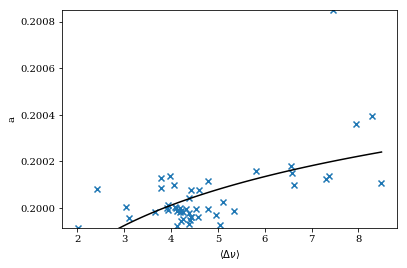

a = 0.266
b = 0.257


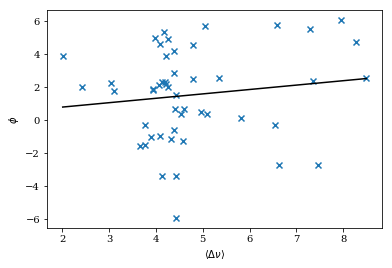

a = -0.042
b = 3.172


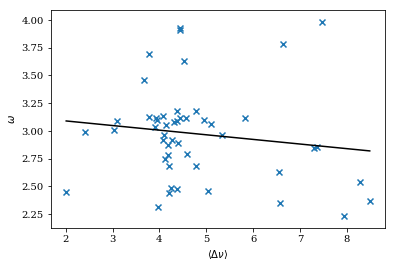

a = -0.000
b = 0.040


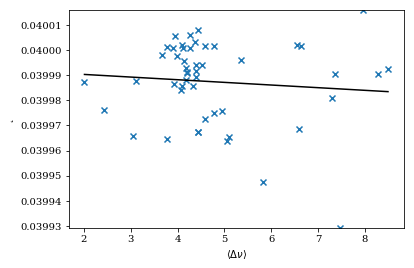

In [72]:
%matplotlib inline

dnu_a = leastsq(np.log(df['dnu']), np.log(df['a']))
plt.figure(1)
plt.scatter(df['dnu'],df['a'], marker='x')
plt.plot(np.exp(dnu_a[0]), np.exp(dnu_a[1]), 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'a')
plt.ylim(min(df['a']),max(df['a']))
plt.show()

dnu_phi = leastsq(df['dnu'], df['phi'])
plt.figure(2)
plt.scatter(df['dnu'],df['phi'], marker='x')
plt.plot(dnu_phi[0], dnu_phi[1], 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\phi$')
plt.show()

dnu_omega = leastsq(df['dnu'], df['omega'])
plt.figure(3)
plt.scatter(df['dnu'],df['omega'], marker='x')
plt.plot(dnu_omega[0], dnu_omega[1], 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\omega$')
plt.show()

dnu_k = leastsq(df['dnu'], df['k'])
plt.figure(4)
plt.scatter(df['dnu'],df['k'], marker='x')
plt.plot(dnu_k[0], dnu_k[1], 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\k$')
plt.ylim(min(df['k']),max(df['k']))
plt.show()

In [14]:
print(df.loc[(df['k']>0.0402)])

        dnu      nmax   epsilon         k         a     omega       phi  \
3  4.996504  7.429712  0.010132  0.040928  0.221116  2.159576  6.273541   

        tau  
3  34.22991  
